#Gerar cruzamento entre ECR x METANALISE

- Há dois programas, ambos recebem uma planilha excel na qual temos a primeira coluna com os ensaios clinicos randomizados (ECRs) e a primeira linha com o nome das metanalises. Nas células de intersecção quando um ECR está presente na metanalise, a celula recebe um 'x'.
---

Exemplo de formato:

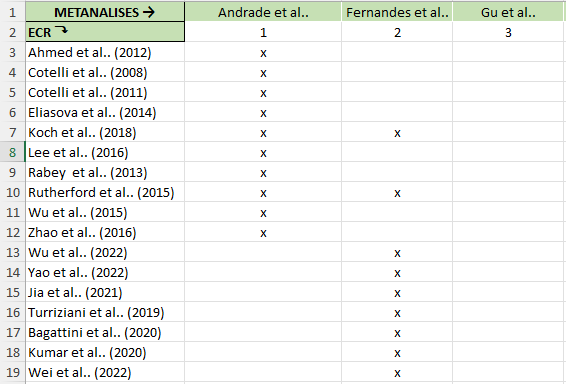

---

###Código um:

- O primeiro programa gera uma imagem heatmap na qual temos os ECRs no eixo vertical e metanalises no eixo horizontal, quando o ECR não está presente na metanalise, a celular de intersecção fica branca, se o ECR estiver na metanalise ela fica colorida (a cor é determinada pelo número de repetições daquele ECR especifico dividido pelo total de repetições de todos os ECR para determinas aqueles que mais se repetem).


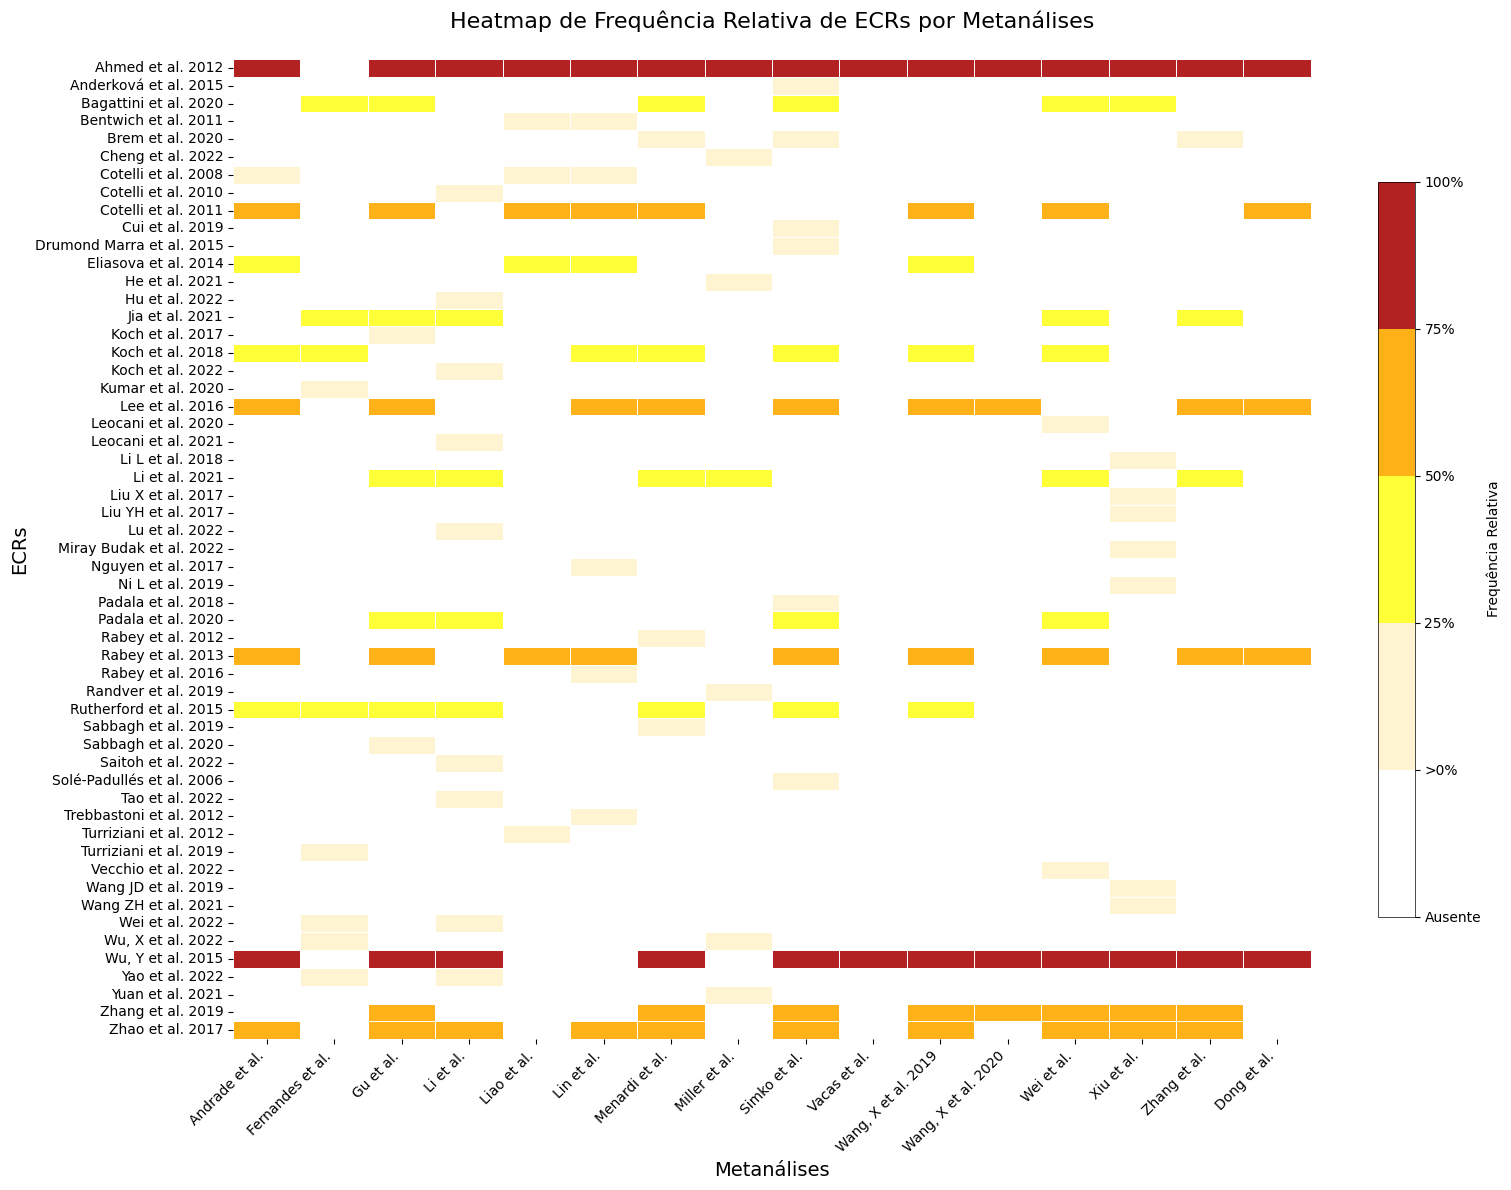

In [ ]:
'''
27-12-2024
Algoritmo para geração de heatmap a partir de planilha ECRxMETANALISES
Antonio Sérgio
'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados da tabela em formato Excel
file_path = "/content/4-Tabela-ECRxMetanalise2.xlsx"
planilha = pd.read_excel(file_path, sheet_name="Corrigida")

'''
# Para Debug: Exibir a planilha carregada
print("Planilha carregada:")
print(planilha)
'''

# Identificar as metanálises (eixo X) e ECRs (eixo Y)
metanalises = planilha.columns[1:]
ECRs = planilha.iloc[:, 0]

# Criar uma matriz de frequência relativa para o heatmap
frequencia = []
max_x_value = len(metanalises)

for _, row in planilha.iloc[:, 1:].iterrows():
    count_x = sum(cell == "X" for cell in row)  # Contar "X" na linha
    frequencia_row = []
    for cell in row:
        if cell == "X":
            frequencia_row.append(count_x / max_x_value)  # Frequência relativa geral
        else:
            frequencia_row.append(0)
    frequencia.append(frequencia_row)

# Converter a lista de frequência em DataFrame
matriz_frequencia = pd.DataFrame(frequencia, columns=metanalises, index=ECRs)

# Criar um heatmap com cores personalizadas
plt.figure(figsize=(16, 12))  #Tamanho da figura
custom_cmap = sns.color_palette([
    "white",         # Para 0.0
    "#FFF4D1",       # Amarelo creme para >0.0 e <=0.25
    "#FFFF37",       # Amarelo forte para >0.25 e <=0.5
    "#FFB217",       # Laranja para >0.5 e <=0.75
    "#B22222"        # Vermelho para >0.75
])

bounds = [0.0, 0.01, 0.25, 0.5, 0.75, 1.0]  # Incluindo limite inferior para 0.0
norm = plt.cm.colors.BoundaryNorm(bounds, len(custom_cmap))
heatmap = sns.heatmap(
    matriz_frequencia,
    annot=False,  # Exibir os valores diretamente no heatmap
    fmt=".2f",
    cmap=custom_cmap,
    cbar_kws={'label': 'Frequência Relativa', 'spacing': 'uniform', 'ticks': bounds, 'shrink' : 0.75},
    norm=norm,
    xticklabels=metanalises,
    yticklabels=ECRs,
    linewidths=0.5
)

# Personalizar os rótulos da régua de cores
cbar = heatmap.collections[0].colorbar
cbar.set_ticklabels(["Ausente", ">0%", "25%", "50%", "75%", "100%"])  # Rótulos personalizados

# Adicionar uma moldura preta à regua de cores
cbar = heatmap.collections[0].colorbar
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(0.5)

plt.title("Heatmap de Frequência Relativa de ECRs por Metanálises\n", fontsize=16)
plt.xlabel("Metanálises", fontsize=14)
plt.ylabel("ECRs", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###Código dois:

- O segundo programa gera uma matriz apenas com os ECR e os colore indo do branco (pelo menos uma citação) até o vermelho (75 - 100% de citações, sendo essa porcentagem dada pelo numero de repetições daquele ECR especifico dividido pelo total de citações).

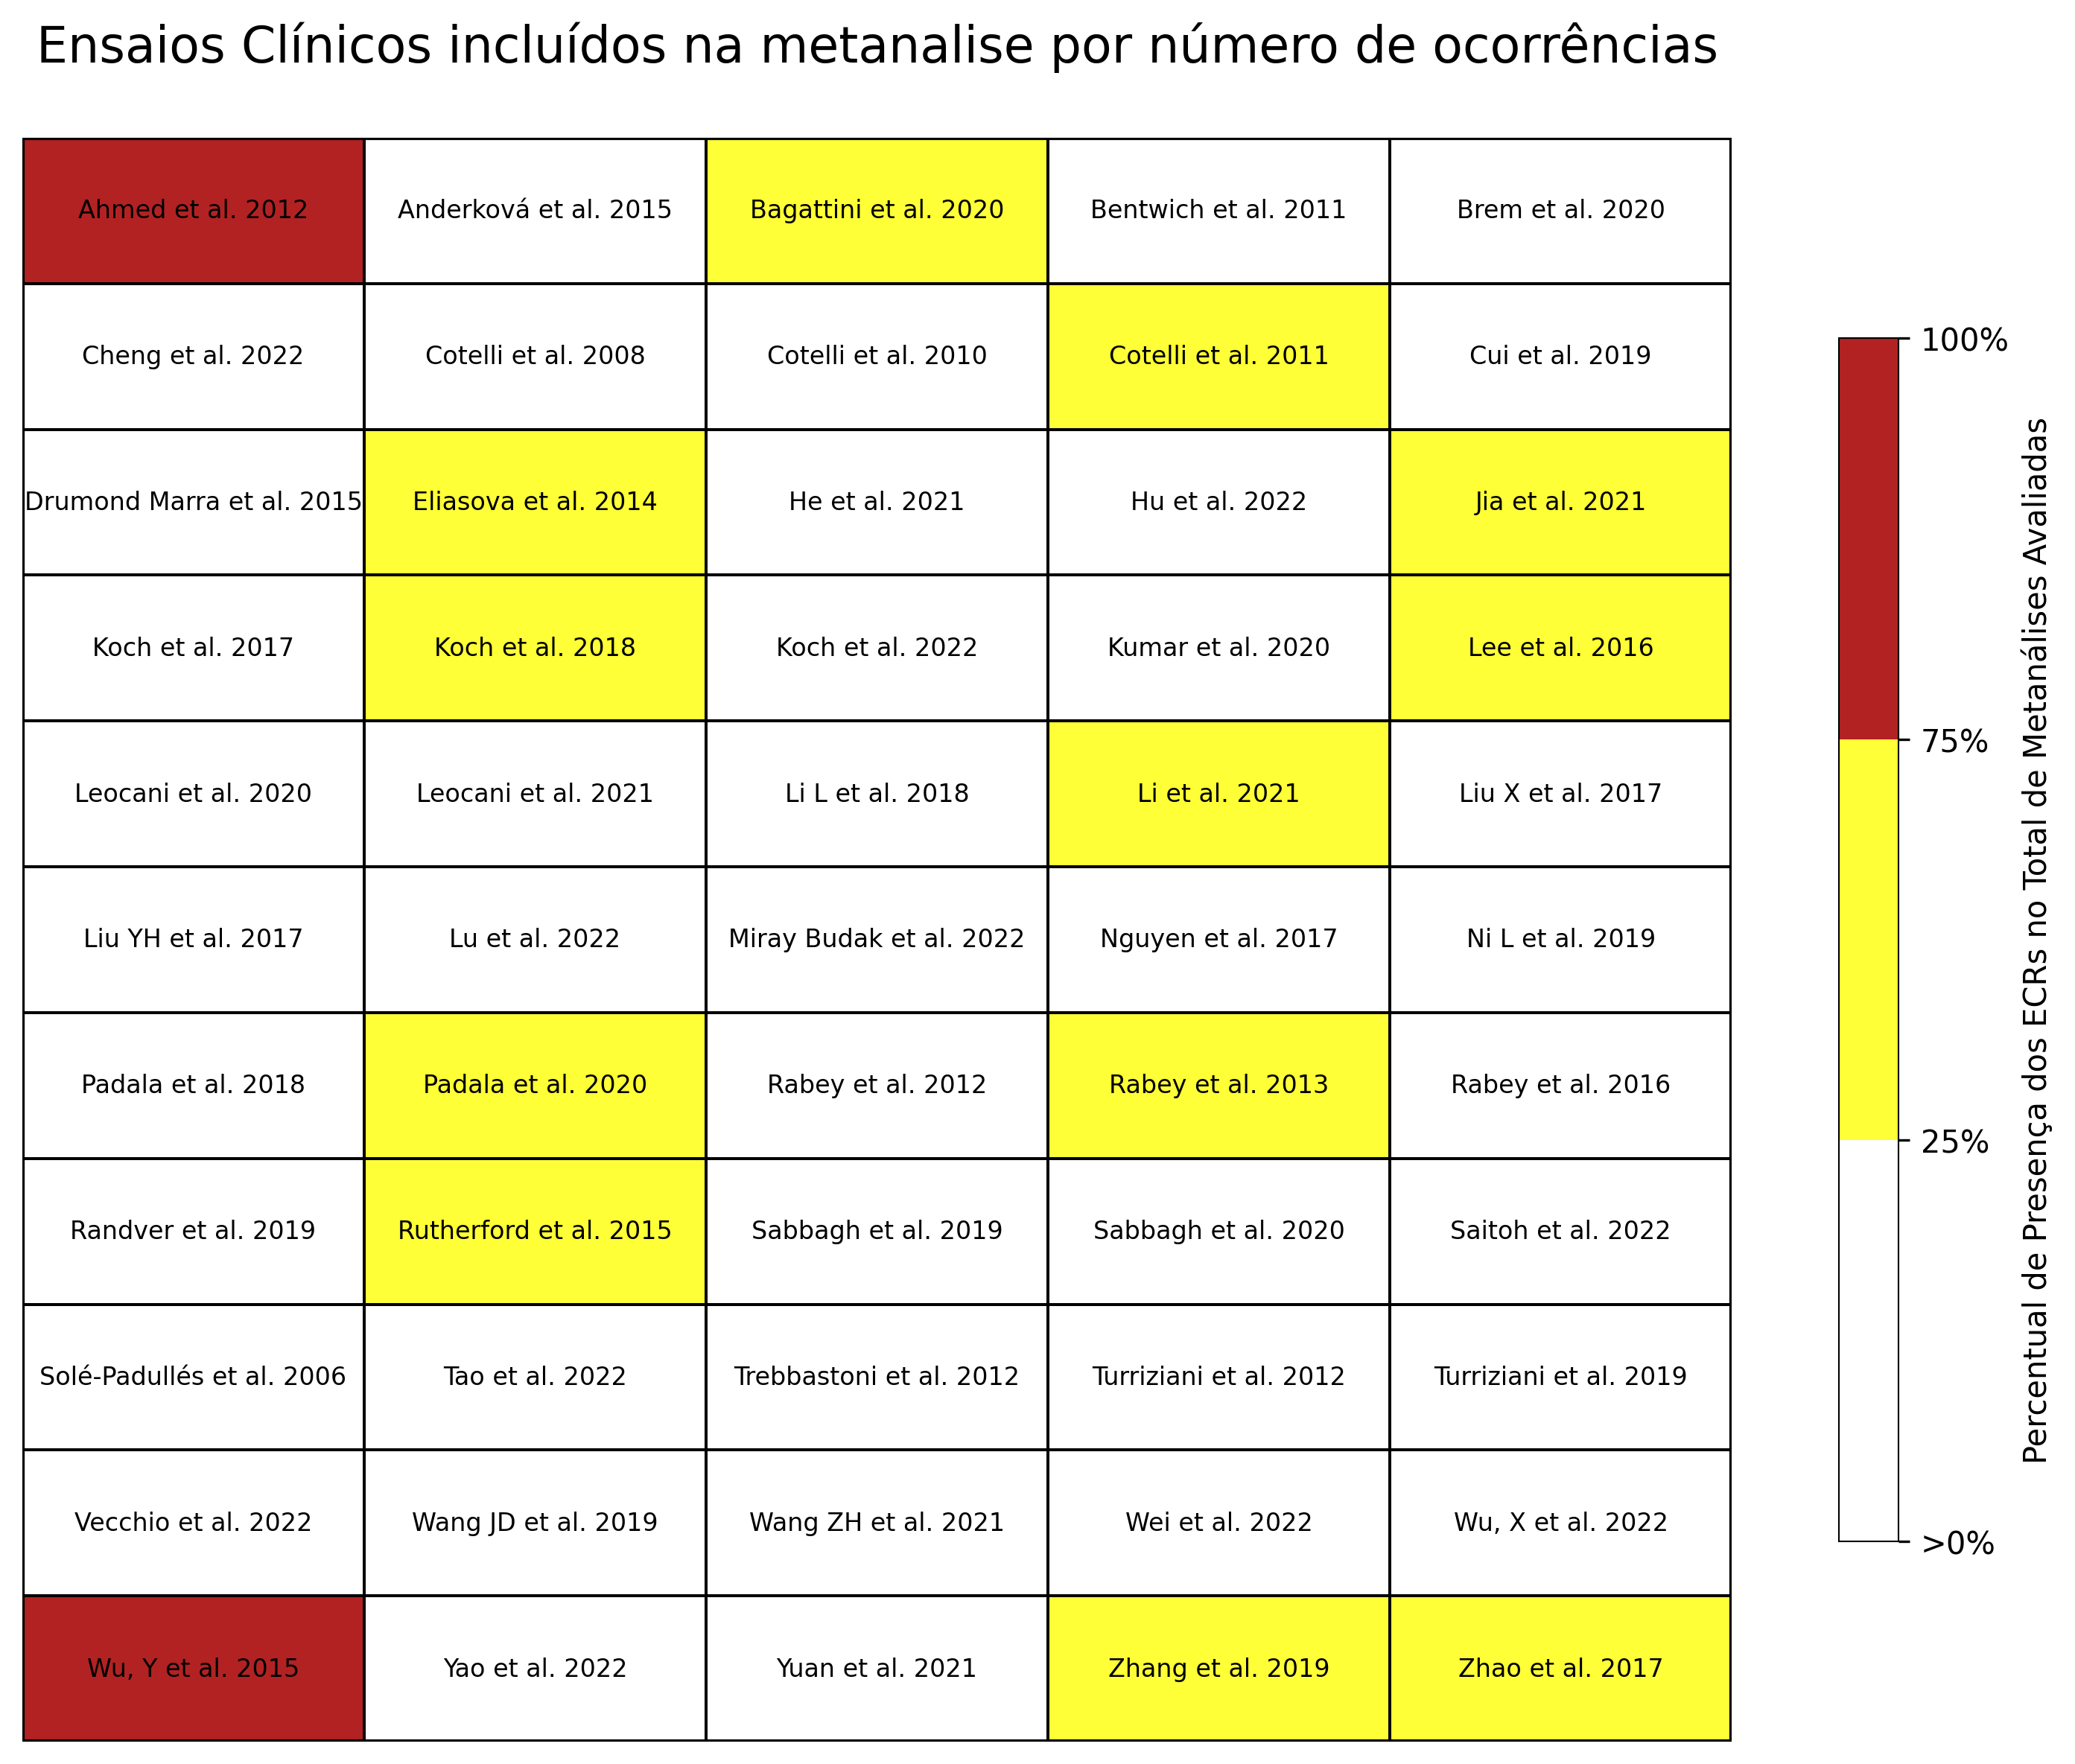

In [ ]:
'''
27-12-2024
Algoritmo para geração de matriz de cores de ECR baseadas em heatmap a partir de planilha ECRxMETANALISES
Antonio Sérgio
'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Carregar os dados da tabela em formato Excel
file_path = "/content/4-Tabela-ECRxMetanalise2.xlsx"
planilha = pd.read_excel(file_path, sheet_name="Corrigida")

# Identificar os ECRs (linhas) e contar a frequência relativa
ECRs = planilha.iloc[:, 0]
metanalises = planilha.columns[1:]

frequencias = [
    sum(cell == "X" for cell in row) / len(metanalises)
    for _, row in planilha.iloc[:, 1:].iterrows()
]

# Converter a lista de frequências em formato matricial (5 colunas x 11 linhas)
frequencias_matriz = np.array(frequencias).reshape(11, 5)

# Ajustar a lista de ECRs para corresponder ao formato da matriz
ECRs_matriz = np.array(ECRs).reshape(11, 5)

# Criar um heatmap com a matriz de frequência
plt.figure(figsize=(10, 8), dpi=300)  # Aumentar DPI para melhorar a qualidade
custom_cmap = sns.color_palette([
    "white",         # Para 0.0
    "#FFFF37",       # Amarelo forte para >0.0 e <=0.25
    "#FFB217",       # Laranja para >0.25 e <=0.75
    "#B22222"        # Vermelho para >0.75
])

# Ajustar os limites (bounds) para refletir 4 intervalos
bounds = [0.0, 0.25, 0.75, 1.0]
norm = plt.cm.colors.BoundaryNorm(bounds, len(custom_cmap))

heatmap = sns.heatmap(
    frequencias_matriz,
    annot=False,  # Não exibir valores numéricos diretamente no heatmap
    fmt=".2f",
    cmap=custom_cmap,
    cbar_kws={'label': 'Percentual de Presença dos ECRs no Total de Metanálises Avaliadas', 'spacing': 'uniform', 'ticks': bounds, 'shrink': 0.75},
    norm=norm,
    linewidths=0.5,
    linecolor='black',
    xticklabels=False,  # Ocultar rótulos do eixo X
    yticklabels=False   # Ocultar rótulos do eixo Y
)

# Adicionar os nomes dos ECRs como texto nas células
for i in range(11):
    for j in range(5):
        plt.text(
            j + 0.5, i + 0.5, ECRs_matriz[i, j],  # Coordenadas e texto
            color="black", ha="center", va="center", fontsize=8
        )

# Adicionar uma borda ao redor de toda a matriz
plt.gca().add_patch(plt.Rectangle(
    (0, 0), 5, 11,  # Coordenadas iniciais e tamanho (colunas, linhas)
    fill=False, edgecolor="black", linewidth=1.5
))

# Personalizar os rótulos da régua de cores
cbar = heatmap.collections[0].colorbar
cbar.set_ticklabels([">0%", "25%", "75%", "100%"])  # Rótulos personalizados

# Adicionar uma moldura preta à regua de cores
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(0.5)

# Adicionar título e personalizar restante do layout
plt.title("Ensaios Clínicos incluídos na metanalise por número de ocorrências\n", fontsize=16)
plt.tight_layout()
plt.show()

